In [16]:
import numpy as np
import pandas as pd
import csv
%matplotlib inline
import matplotlib.pyplot as plt
from math import factorial as fact
from math import sqrt
import math
from scipy.stats import binom, norm, poisson

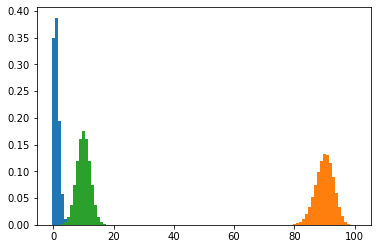

In [6]:
def combination(n,r):
    return fact(n)/(fact(r)*fact(n-r))

def binomial(n,success_prob):
    prob=[]
    for x in range(n+1):
        p=combination(n,x)*pow(success_prob,x)*pow(1-success_prob,n-x)
        prob.append(p)
    plt.bar(range(n+1),prob,width=1)

binomial(10,0.1)
binomial(100,0.9)
binomial(20,0.5)

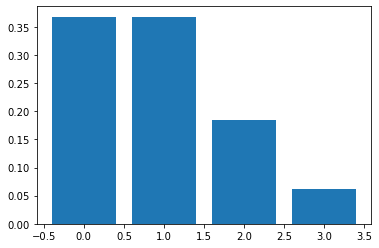

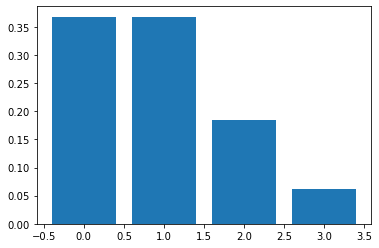

In [7]:
def poisson(l):
    prob=[]
    p_x=1
    x=0
    
    while(p_x>0000000.1):
        p_x=math.exp(-1)*pow(1,x)/math.factorial(x)
        prob.append(p_x)
        x=x+1
    plt.bar(range(x),prob)
    plt.show()
    

poisson(3)
poisson(6)

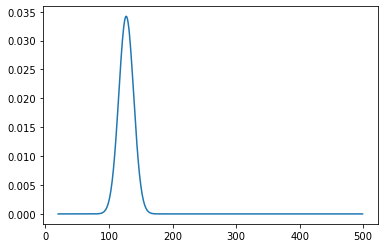

In [10]:
# Find Probability Density Function of Weight and Plot it
data = pd.read_csv("C:/Users/Riya_Asmi/Downloads/height-weight.csv")
data.head()

weight = data['weight']
weight_mean = weight.mean()
weight_std = weight.std()

weight_pdf = []
for i in range(20,500):
    weight_pdf.append(norm.pdf(i,weight_mean,weight_std))

plt.plot(range(20,500),weight_pdf)
plt.show()

population weight mean/avg =  127.07942116079916
population standard deviation =  127.07942116079916
Expected uncertainty 0.36874258355605316
avg of all avg weights: mean of means :  127.06085800049999
uncertainty in the esitimate: 1.1825208326599794


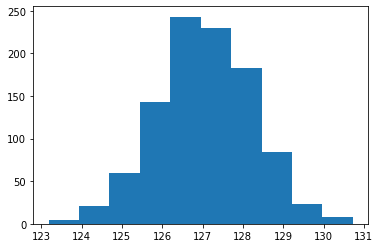

In [12]:
df = pd.read_csv("C:/Users/Riya_Asmi/Downloads/height-weight.csv")

pop_wt=np.mean(df['weight'])
print('population weight mean/avg = ',pop_wt)

pop_std=np.std(df['weight'])
print('population standard deviation = ',pop_wt)


def samp_dist(sample_size,no_of_samples):
    wt=[]
    
    for i in range(no_of_samples):
        sample=df.weight.sample(sample_size)
        wt.append(np.mean(sample))
        
    plt.hist(wt)
    print('avg of all avg weights: mean of means : ',np.mean(wt))
    print('uncertainty in the esitimate:',np.std(wt))

print('Expected uncertainty',pop_std/math.sqrt(1000))
samp_dist(100,1000)

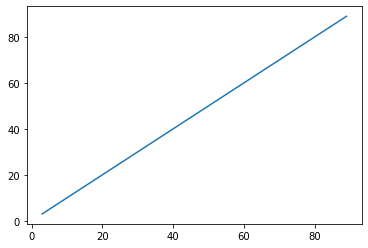

In [14]:
x=[3.01,4.35,5.79,5.96,60,89]

def normality_check(data):
    pos=[]
    th_Q=[]
    data= np.sort(np.array(data))
    pos=[(1-0.5)/len(data) for i in range(1,len(data)+1)]
    th_Q=[norm.ppf(i,np.mean(data),np.std(data,ddof=1)) for i in range(1, len(data)+1)]
    plt.plot(data,th_Q,'ro',data,data)
    plt.show()

normality_check(x)

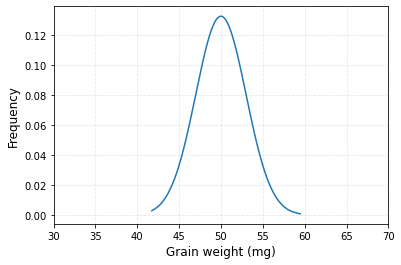

In [15]:
#Generating data frame
x = np.random.normal(50, 3, 1000)
source = {"Genotype": ["CV1"]*1000, "AGW": x}
df = pd.DataFrame(source)

# Calculating mean and Stdev of AGW
df_mean = np.mean(df["AGW"])
df_std = np.std(df["AGW"])
 
# Calculating probability density function (PDF)

pdf= norm.pdf(df["AGW"].sort_values(), df_mean, df_std)
# pdf = stats.norm.pdf(df["AGW"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["AGW"].sort_values(), pdf)
plt.xlim([30,70])  
plt.xlabel("Grain weight (mg)", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

In [17]:
#continuity correction X follows binomial

# X~Bin(100,0.5)
#X~N(50,sd=5)
# P(45<=X<=55)

print('using X~ Bin(100,0.5, P(45<=X<=55)')
print(binom.cdf(55,100,0.5)-binom.cdf(44,100,0.5))

print('using X~N(100*0.5,100*0.25), P(45<=X<=55)')
print(norm.cdf(55,50,0.5)-norm.cdf(45,50,0.5))

print('Applying continuity correction:')
print(norm.cdf(55.5,50,5)-norm.cdf(44.5,50,5))

using X~ Bin(100,0.5, P(45<=X<=55)
0.7287469759261658
using X~N(100*0.5,100*0.25), P(45<=X<=55)
1.0
Applying continuity correction:
0.7286678781072347
